In [1]:
                                            ### Practical Python Implementations ###



## 1. Z-test for Comparing a Sample Mean to a Known Population Mean


import numpy as np
from statsmodels.stats.weightstats import ztest

# Sample data
data = [2.5, 3.0, 2.8, 3.2, 2.9, 3.5, 3.1, 2.7, 3.3, 2.9]
population_mean = 3.0
alpha = 0.05

# Perform Z-test
z_stat, p_value = ztest(data, value=population_mean)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")





Z-statistic: -0.1068
P-value: 0.9149
Fail to reject the null hypothesis: There is no significant difference.


In [2]:
## 2. Simulate Data and Perform Hypothesis Testing


import numpy as np
from scipy import stats

# Simulate random data from a normal distribution
np.random.seed(0)
sample_data = np.random.normal(loc=105, scale=10, size=50)
population_mean = 100
alpha = 0.05

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(sample_data, population_mean)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")




T-statistic: 3.9839
P-value: 0.0002
Reject the null hypothesis.


In [3]:
## 3. Implement a One-Sample Z-test


import numpy as np
from statsmodels.stats.weightstats import ztest

def one_sample_ztest(sample_data, pop_mean, alpha=0.05):
    """
    Performs a one-sample Z-test.
    """
    z_stat, p_value = ztest(sample_data, value=pop_mean)
    
    print(f"Z-statistic: {z_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")

# Example usage
sample = np.random.normal(loc=5.2, scale=1.5, size=100)
one_sample_ztest(sample, 5.0)





Z-statistic: 2.5941
P-value: 0.0095
Reject the null hypothesis.


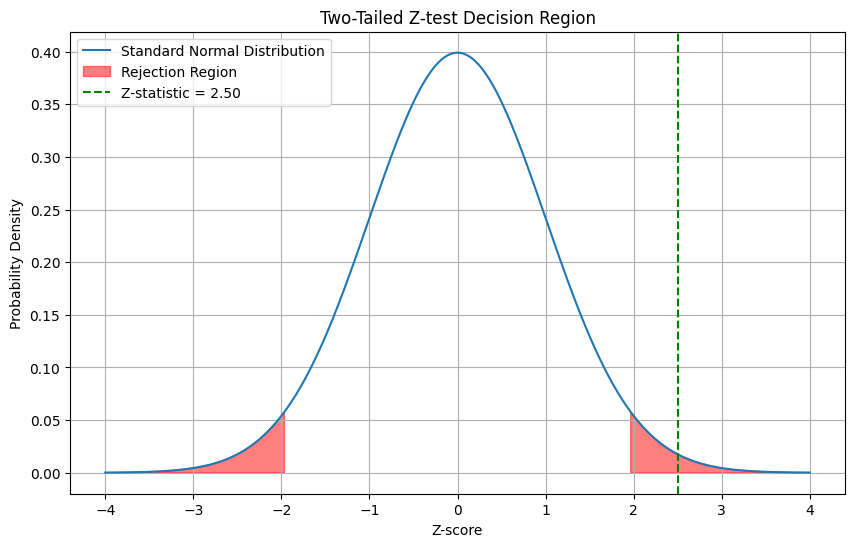

P-value: 0.0124
Reject the null hypothesis.


In [4]:
## 4. Two-Tailed Z-test with Visualization


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

# Z-test result
z_stat = 2.5
p_value = stats.norm.sf(abs(z_stat)) * 2
alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha/2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, y, where=(x > critical_value) | (x < -critical_value), color='red', alpha=0.5, label='Rejection Region')
plt.axvline(z_stat, color='green', linestyle='--', label=f'Z-statistic = {z_stat:.2f}')
plt.title('Two-Tailed Z-test Decision Region')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print("Reject the null hypothesis.")




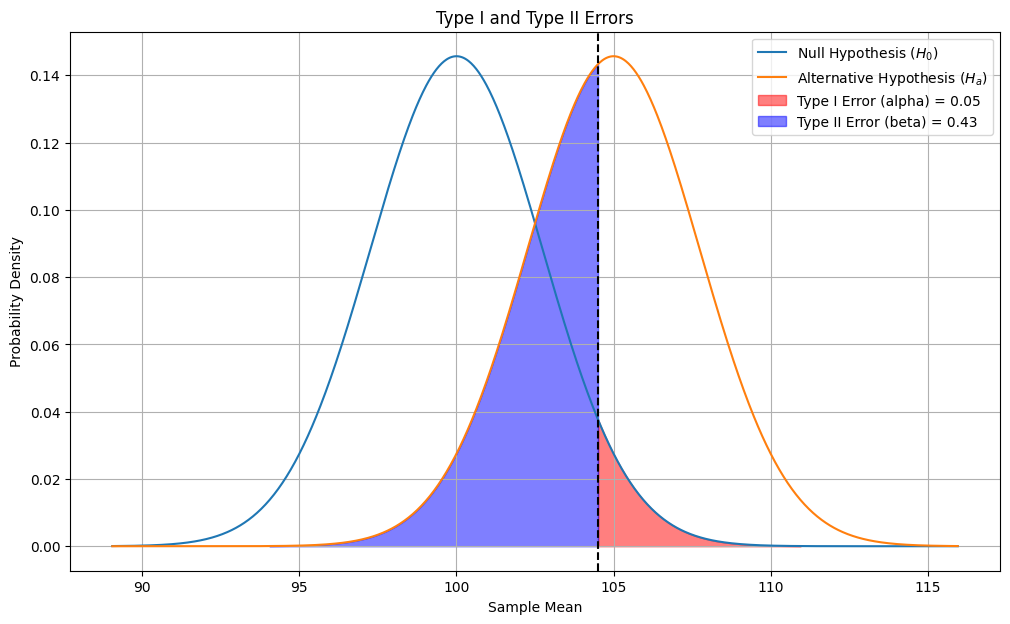

In [5]:
## 5. Visualize Type 1 and Type 2 Errors


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_errors(mu0, mu1, sigma, n, alpha):
    """
    Visualizes Type I and Type II errors.
    """
    se = sigma / np.sqrt(n)
    x = np.linspace(mu0 - 4*se, mu1 + 4*se, 1000)
    
    # Null and alternative distributions
    null_dist = norm(mu0, se)
    alt_dist = norm(mu1, se)

    # Critical value
    critical_value = norm.ppf(1 - alpha, loc=mu0, scale=se)

    plt.figure(figsize=(12, 7))
    plt.plot(x, null_dist.pdf(x), label='Null Hypothesis ($H_0$)')
    plt.plot(x, alt_dist.pdf(x), label='Alternative Hypothesis ($H_a$)')

    # Type I error (alpha)
    x_alpha = np.linspace(critical_value, mu0 + 4*se, 100)
    plt.fill_between(x_alpha, null_dist.pdf(x_alpha), color='red', alpha=0.5, label=f'Type I Error (alpha) = {alpha:.2f}')

    # Type II error (beta)
    x_beta = np.linspace(mu1 - 4*se, critical_value, 100)
    beta = alt_dist.cdf(critical_value)
    plt.fill_between(x_beta, alt_dist.pdf(x_beta), color='blue', alpha=0.5, label=f'Type II Error (beta) = {beta:.2f}')
    
    plt.axvline(critical_value, color='black', linestyle='--')
    plt.title('Type I and Type II Errors')
    plt.xlabel('Sample Mean')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
visualize_errors(mu0=100, mu1=105, sigma=15, n=30, alpha=0.05)




In [6]:
## 6. Independent T-test


import numpy as np
from scipy import stats

# Sample data for two independent groups
group1 = np.random.normal(loc=10, scale=2, size=30)
group2 = np.random.normal(loc=12, scale=2, size=30)

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis.")




T-statistic: -3.8025
P-value: 0.0003
Reject the null hypothesis: The means of the two groups are significantly different.


T-statistic: 7.6756
P-value: 0.0000


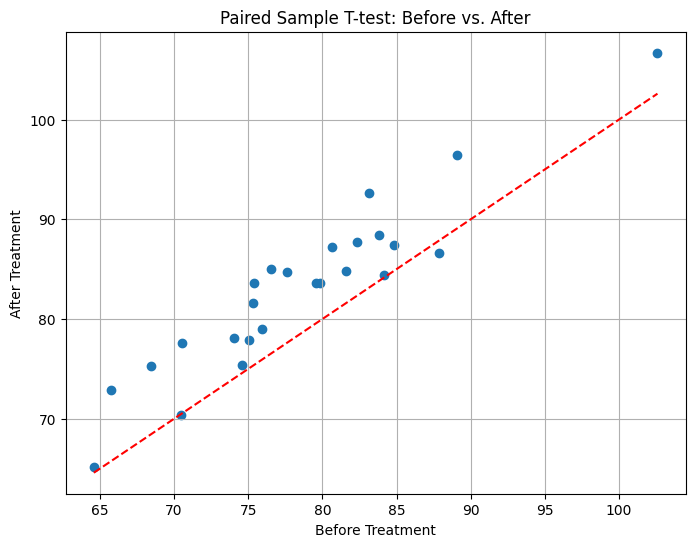

In [7]:
## 7. Paired Sample T-test with Visualization


import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Paired sample data (e.g., before and after treatment)
before = np.random.normal(loc=80, scale=10, size=25)
after = before + np.random.normal(loc=5, scale=3, size=25)

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(after, before)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(before, after)
plt.plot([min(before), max(before)], [min(before), max(before)], color='red', linestyle='--')
plt.title('Paired Sample T-test: Before vs. After')
plt.xlabel('Before Treatment')
plt.ylabel('After Treatment')
plt.grid(True)
plt.show()




In [8]:
## 8. Compare Z-test and T-test


import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy import stats

# Simulate data
sample = np.random.normal(loc=15.5, scale=2.5, size=50)
pop_mean = 15.0
pop_std_dev = 2.5 # Assumed for Z-test

# Perform Z-test
z_stat, z_p_value = ztest(sample, value=pop_mean, ddof=0)

# Perform T-test
t_stat, t_p_value = stats.ttest_1samp(sample, pop_mean)

print(f"Z-test: Z-statistic = {z_stat:.4f}, P-value = {z_p_value:.4f}")
print(f"T-test: T-statistic = {t_stat:.4f}, P-value = {t_p_value:.4f}")
print("\nFor larger sample sizes, the Z-test and T-test results are very similar.")




Z-test: Z-statistic = 1.3283, P-value = 0.1841
T-test: T-statistic = 1.3149, P-value = 0.1947

For larger sample sizes, the Z-test and T-test results are very similar.


In [9]:
## 9. Calculate Confidence Interval for a Sample Mean


import numpy as np
from scipy import stats

def confidence_interval_mean(data, confidence=0.95):
    """
    Calculates the confidence interval for a sample mean.
    """
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data) # Standard error of the mean
    
    ci = stats.t.interval(confidence, df=n-1, loc=mean, scale=se)
    
    print(f"{confidence*100}% Confidence Interval: {ci}")
    print("This means we are " + str(confidence*100) + "% confident that the true population mean lies within this interval.")

# Example usage
sample = np.random.normal(loc=20, scale=5, size=100)
confidence_interval_mean(sample)




95.0% Confidence Interval: (np.float64(18.11693392931699), np.float64(19.941493311283924))
This means we are 95.0% confident that the true population mean lies within this interval.


In [10]:
## 10. Calculate Margin of Error


import numpy as np
from scipy import stats

def margin_of_error(data, confidence=0.95):
    """
    Calculates the margin of error for a given confidence level.
    """
    n = len(data)
    se = stats.sem(data)
    
    moe = se * stats.t.ppf((1 + confidence) / 2., n-1)
    
    print(f"Margin of Error: {moe:.4f}")
    return moe

# Example usage
sample = np.random.normal(loc=50, scale=10, size=40)
moe = margin_of_error(sample)




Margin of Error: 3.0601


In [11]:
## 11. Bayesian Inference with Bayes' Theorem


def bayesian_inference(prior, likelihood, evidence):
    """
    Simple implementation of Bayes' Theorem.
    """
    posterior = (likelihood * prior) / evidence
    return posterior

# Example: Medical Diagnosis
# P(A) = Prior probability of having the disease
# P(B|A) = Probability of testing positive given the disease (sensitivity)
# P(B) = Overall probability of testing positive

p_disease = 0.01
p_positive_given_disease = 0.99 # Sensitivity
p_positive_given_no_disease = 0.05 # False positive rate
p_no_disease = 1 - p_disease

# P(B) = P(B|A)P(A) + P(B|not A)P(not A)
p_positive = (p_positive_given_disease * p_disease) + (p_positive_given_no_disease * p_no_disease)

# Calculate P(Disease | Positive Test)
p_disease_given_positive = bayesian_inference(p_disease, p_positive_given_disease, p_positive)

print(f"Posterior probability of having the disease given a positive test: {p_disease_given_positive:.4f}")




Posterior probability of having the disease given a positive test: 0.1667


In [12]:
## 12. Chi-square Test for Independence


import numpy as np
from scipy.stats import chi2_contingency

# Observed data in a contingency table
# Rows: Smoker, Non-smoker; Columns: Lung Cancer, No Lung Cancer
observed = np.array([[50, 10], [20, 120]])

chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

if p < 0.05:
    print("\nReject the null hypothesis: There is a significant association between smoking and lung cancer.")
else:
    print("\nFail to reject the null hypothesis.")




Chi-square statistic: 85.0078
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[21. 39.]
 [49. 91.]]

Reject the null hypothesis: There is a significant association between smoking and lung cancer.


In [13]:
## 13. Calculate Expected Frequencies for Chi-square Test


import numpy as np

def expected_frequencies(observed_table):
    """
    Calculates expected frequencies for a Chi-square test.
    """
    row_totals = observed_table.sum(axis=1)
    col_totals = observed_table.sum(axis=0)
    grand_total = observed_table.sum()
    
    expected_table = np.outer(row_totals, col_totals) / grand_total
    return expected_table

# Example usage
observed = np.array([[30, 10], [15, 25]])
expected = expected_frequencies(observed)
print("Observed Frequencies:\n", observed)
print("\nExpected Frequencies:\n", expected)




Observed Frequencies:
 [[30 10]
 [15 25]]

Expected Frequencies:
 [[22.5 17.5]
 [22.5 17.5]]


In [14]:
## 14. Goodness-of-Fit Test


from scipy.stats import chisquare

# Observed frequencies of dice rolls
observed = [9, 11, 8, 12, 10, 10] # Total 60 rolls
# Expected frequencies for a fair die
expected = [10, 10, 10, 10, 10, 10]

chi2, p = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Reject the null hypothesis: The die is likely not fair.")
else:
    print("Fail to reject the null hypothesis: The die appears to be fair.")




Chi-square statistic: 1.0000
P-value: 0.9626
Fail to reject the null hypothesis: The die appears to be fair.


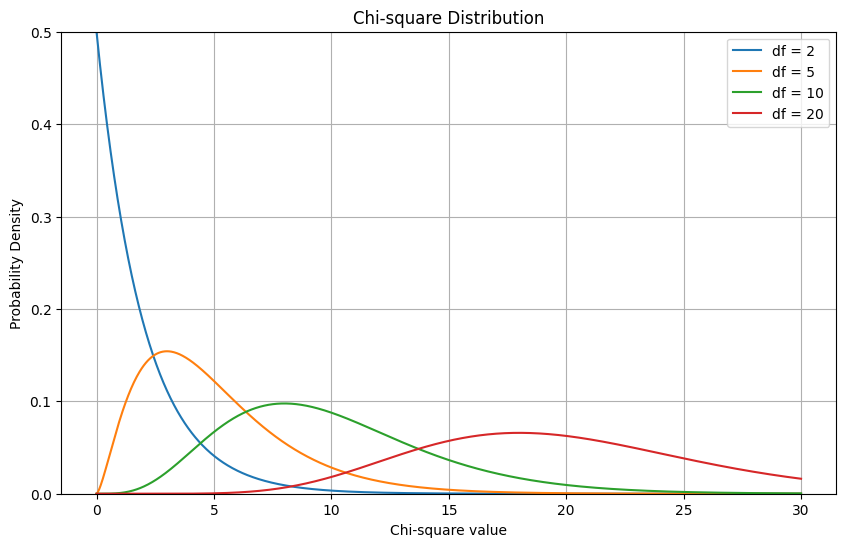

Characteristics: The Chi-square distribution is right-skewed and its shape depends on the degrees of freedom. As df increases, it approaches a normal distribution.


In [15]:
## 15. Visualize Chi-square Distribution


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Degrees of freedom
df_values = [2, 5, 10, 20]
x = np.linspace(0, 30, 1000)

plt.figure(figsize=(10, 6))
for df in df_values:
    plt.plot(x, chi2.pdf(x, df), label=f'df = {df}')

plt.title('Chi-square Distribution')
plt.xlabel('Chi-square value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.5)
plt.show()
print("Characteristics: The Chi-square distribution is right-skewed and its shape depends on the degrees of freedom. As df increases, it approaches a normal distribution.")




In [16]:
## 16. F-test for Comparing Variances


import numpy as np
from scipy.stats import f

def f_test_variances(sample1, sample2):
    """
    Performs an F-test to compare the variances of two samples.
    """
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    n1, n2 = len(sample1), len(sample2)
    
    f_stat = var1 / var2
    df1, df2 = n1 - 1, n2 - 1
    
    p_value = f.cdf(f_stat, df1, df2)
    
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

# Example usage
groupA = np.random.normal(loc=10, scale=3, size=20)
groupB = np.random.normal(loc=10, scale=5, size=20)
f_test_variances(groupA, groupB)




F-statistic: 0.3512
P-value: 0.0138


In [17]:
## 17. ANOVA Test


import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Sample data for three groups
data = {'values': np.concatenate([np.random.normal(10, 2, 20),
                                  np.random.normal(15, 2, 20),
                                  np.random.normal(12, 2, 20)]),
        'group': ['A']*20 + ['B']*20 + ['C']*20}
df = pd.DataFrame(data)

# Fit ANOVA model
model = ols('values ~ group', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
print("\nInterpretation: Look at the P-value (PR(>F)). If it's less than your significance level, it means there is a significant difference between the means of the groups.")




              sum_sq    df          F        PR(>F)
group     258.731360   2.0  25.507265  1.225156e-08
Residual  289.087982  57.0        NaN           NaN

Interpretation: Look at the P-value (PR(>F)). If it's less than your significance level, it means there is a significant difference between the means of the groups.


F-statistic: 3.9698, P-value: 0.0224


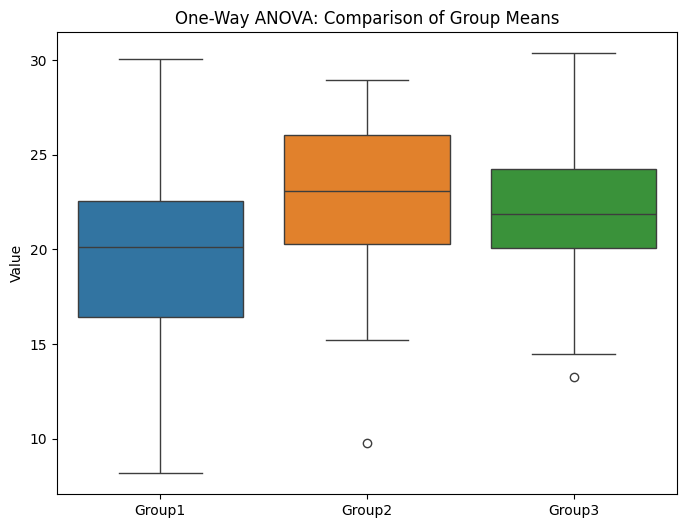

In [18]:
## 18. One-Way ANOVA with Plot


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Sample data
group1 = np.random.normal(20, 5, 30)
group2 = np.random.normal(25, 5, 30)
group3 = np.random.normal(22, 5, 30)

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

# Plotting
df = pd.DataFrame({'Group1': group1, 'Group2': group2, 'Group3': group3})
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('One-Way ANOVA: Comparison of Group Means')
plt.ylabel('Value')
plt.show()




In [43]:
## **19. Check ANOVA Assumptions**

import pandas as pd
from scipy.stats import shapiro, levene

def check_anova_assumptions(data, group_col, value_col):
    """
    Checks normality and homogeneity of variances.
    """

    if group_col not in data.columns or value_col not in data.columns:
        print(f"Error: Column names '{group_col}' or '{value_col}' not found.")
        print(f"Available columns: {list(data.columns)}")
        return


    unique_groups = data[group_col].unique()
    

    print("--- Normality Check (Shapiro-Wilk) ---")
    for g_name in unique_groups:
        group_data = data[data[group_col] == g_name][value_col]
        
        # Shapiro-Wilk requires at least 3 data points
        if len(group_data) >= 3:
            stat, p = shapiro(group_data)
            status = " Normal" if p > 0.05 else " Not Normal (p < 0.05)"
            print(f"Group {g_name:10}: p-value = {p:.4f} -> {status}")
        else:
            print(f"Group {g_name:10}: Sample size too small (n < 3)")

  
    print("\n--- Homogeneity of Variances (Levene's test) ---")
    samples = [data[data[group_col] == g_name][value_col] for g_name in unique_groups]
    
    stat, p = levene(*samples)
    status = "Equal Variances" if p > 0.05 else " Variances Not Equal (p < 0.05)"
    print(f"p-value = {p:.4f} -> {status}")


check_anova_assumptions(df, 'group', 'values')

Error: Column names 'group' or 'values' not found.
Available columns: ['A', 'B', 'C']


                           sum_sq    df           F        PR(>F)
C(factor1)             572.752750   1.0  121.598878  1.964373e-17
C(factor2)             177.849550   1.0   37.758537  3.408282e-08
C(factor1):C(factor2)   13.074506   1.0    2.775797  9.981582e-02
Residual               357.973773  76.0         NaN           NaN


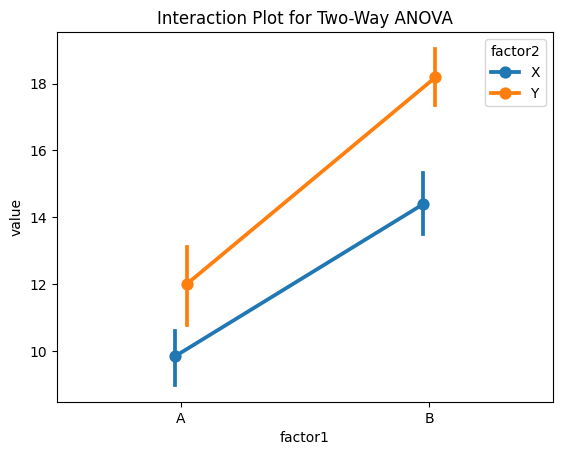

In [23]:
## 20. Two-Way ANOVA


import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Sample data with two factors
data = {'factor1': ['A']*20 + ['B']*20 + ['A']*20 + ['B']*20,
        'factor2': ['X']*40 + ['Y']*40,
        'value': np.concatenate([np.random.normal(10, 2, 20),
                                 np.random.normal(15, 2, 20),
                                 np.random.normal(12, 2, 20),
                                 np.random.normal(18, 2, 20)])}
df = pd.DataFrame(data)

# Fit Two-Way ANOVA model
model = ols('value ~ C(factor1) + C(factor2) + C(factor1):C(factor2)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Visualize interaction
sns.pointplot(data=df, x='factor1', y='value', hue='factor2', dodge=True)
plt.title('Interaction Plot for Two-Way ANOVA')
plt.show()




Sample 1 Variance: 3.4869 | Sample 2 Variance: 6.8800
F-statistic: 1.9731 | P-value: 0.0191
Result: Significant difference in variances (Reject H0)


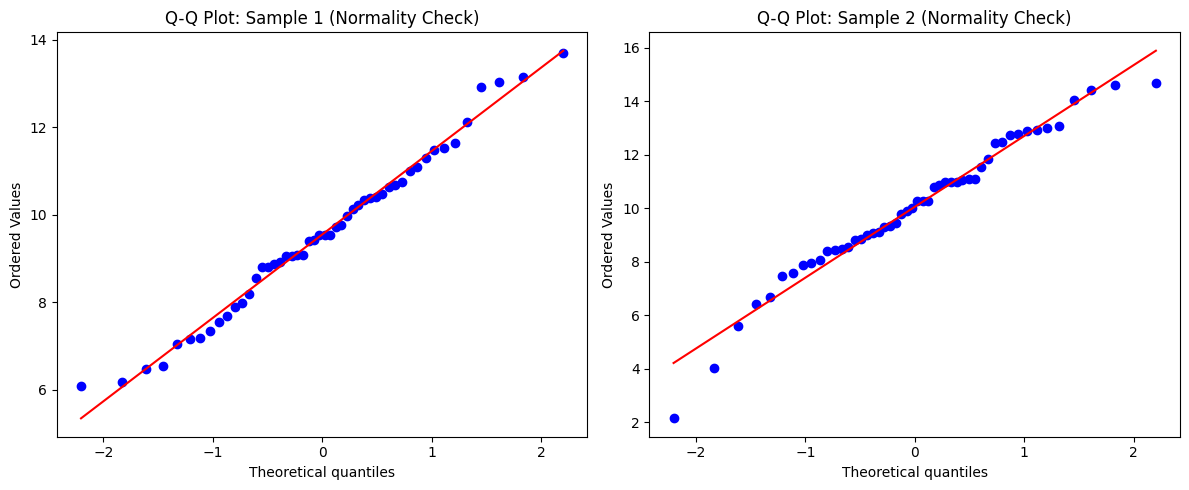

In [42]:
## 21. Visualize F-distribution


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f, probplot

def f_test_and_visualize(sample1, sample2):
    """
    Performs an F-test to compare variances and visualizes normality via Q-Q plots.
    """
    n1, n2 = len(sample1), len(sample2)
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    
    # The F-statistic is typically the ratio of the larger variance to the smaller one
    if var1 > var2:
        f_stat = var1 / var2
        df1, df2 = n1 - 1, n2 - 1
    else:
        f_stat = var2 / var1
        df1, df2 = n2 - 1, n1 - 1
    
    # P-value for a two-tailed test
    # We multiply by 2 because the F-test for equality of variances is usually two-sided
    p_value = 2 * (1 - f.cdf(f_stat, df1, df2))
    
    print(f"Sample 1 Variance: {var1:.4f} | Sample 2 Variance: {var2:.4f}")
    print(f"F-statistic: {f_stat:.4f} | P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Result: Significant difference in variances (Reject H0)")
    else:
        print("Result: No significant difference in variances (Fail to reject H0)")

    # Visualization (Q-Q plots)
    # The F-test assumes both samples are normally distributed!
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    probplot(sample1, dist="norm", plot=plt)
    plt.title('Q-Q Plot: Sample 1 (Normality Check)')
    
    plt.subplot(1, 2, 2)
    probplot(sample2, dist="norm", plot=plt)
    plt.title('Q-Q Plot: Sample 2 (Normality Check)')
    
    plt.tight_layout()
    plt.show()

# Example usage
np.random.seed(42) # For reproducibility
s1 = np.random.normal(10, 2, 50) # Std Dev = 2, Var = 4
s2 = np.random.normal(10, 3, 50) # Std Dev = 3, Var = 9
f_test_and_visualize(s1, s2)

F-statistic: 7.3118, P-value: 0.0009


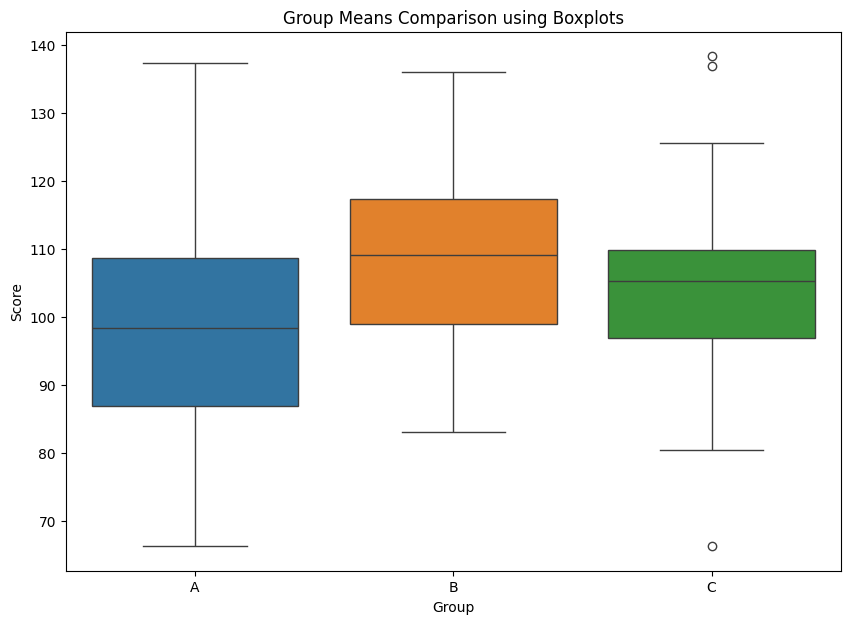

In [28]:
## 22. One-Way ANOVA with Boxplots



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Data for different groups
data = {'A': np.random.normal(100, 15, 50),
        'B': np.random.normal(110, 15, 50),
        'C': np.random.normal(105, 15, 50)}
df = pd.DataFrame(data)

f_stat, p_value = f_oneway(df['A'], df['B'], df['C'])
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

# Visualize with boxplots
plt.figure(figsize=(10, 7))
sns.boxplot(data=df)
plt.title('Group Means Comparison using Boxplots')
plt.ylabel('Score')
plt.xlabel('Group')
plt.show()




In [29]:
## 23. Simulate Normal Data and Test Means


import numpy as np
from scipy.stats import ttest_1samp

# Simulate data from a normal distribution
np.random.seed(42)
simulated_data = np.random.normal(loc=50, scale=10, size=100)
hypothesized_mean = 52

# Perform hypothesis test (one-sample t-test)
t_stat, p_value = ttest_1samp(simulated_data, hypothesized_mean)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print(f"Reject the null hypothesis: The mean of the simulated data is significantly different from {hypothesized_mean}.")
else:
    print("Fail to reject the null hypothesis.")




T-statistic: -3.3457
P-value: 0.0012
Reject the null hypothesis: The mean of the simulated data is significantly different from 52.


In [30]:
## 24. Hypothesis Test for Population Variance


import numpy as np
from scipy.stats import chi2

def test_population_variance(sample_data, pop_variance, alpha=0.05):
    """
    Performs a Chi-square test for population variance.
    """
    n = len(sample_data)
    sample_var = np.var(sample_data, ddof=1)
    
    chi2_stat = (n - 1) * sample_var / pop_variance
    
    # Two-tailed test
    p_value = 2 * min(chi2.cdf(chi2_stat, n - 1), 1 - chi2.cdf(chi2_stat, n - 1))

    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < alpha:
        print(f"Reject the null hypothesis: The sample variance is significantly different from {pop_variance}.")
    else:
        print("Fail to reject the null hypothesis.")

# Example
data = np.random.normal(loc=0, scale=5, size=30)
test_population_variance(data, pop_variance=25) # 5^2




Chi-square statistic: 31.9205
P-value: 0.6467
Fail to reject the null hypothesis.


In [31]:
## 25. Z-test for Comparing Proportions


from statsmodels.stats.proportion import proportions_ztest

# Data: number of successes and number of observations
count = np.array([50, 80]) # Successes in group 1 and 2
nobs = np.array([100, 120]) # Total observations in group 1 and 2

z_stat, p_value = proportions_ztest(count, nobs)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The proportions are significantly different.")
else:
    print("Fail to reject the null hypothesis.")




Z-statistic: -2.5036
P-value: 0.0123
Reject the null hypothesis: The proportions are significantly different.


Sample 1 Variance: 3.4869 | Sample 2 Variance: 6.8800
F-statistic: 1.9731 | P-value: 0.0191
Result: Significant difference in variances (Reject H0)


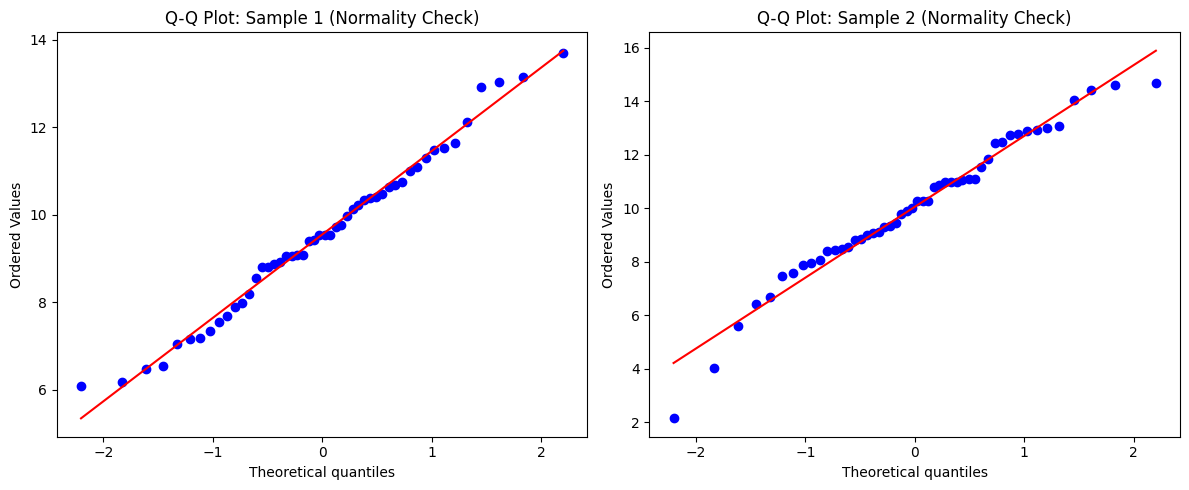

In [33]:
## 26. F-test for Comparing Variances with Visualization


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f, probplot

def f_test_and_visualize(sample1, sample2):
    """
    Performs an F-test to compare variances and visualizes normality via Q-Q plots.
    """
    n1, n2 = len(sample1), len(sample2)
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    
    # The F-statistic is typically the ratio of the larger variance to the smaller one
    if var1 > var2:
        f_stat = var1 / var2
        df1, df2 = n1 - 1, n2 - 1
    else:
        f_stat = var2 / var1
        df1, df2 = n2 - 1, n1 - 1
    
    # P-value for a two-tailed test
    # We multiply by 2 because the F-test for equality of variances is usually two-sided
    p_value = 2 * (1 - f.cdf(f_stat, df1, df2))
    
    print(f"Sample 1 Variance: {var1:.4f} | Sample 2 Variance: {var2:.4f}")
    print(f"F-statistic: {f_stat:.4f} | P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Result: Significant difference in variances (Reject H0)")
    else:
        print("Result: No significant difference in variances (Fail to reject H0)")

    # Visualization (Q-Q plots)
    # The F-test assumes both samples are normally distributed!
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    probplot(sample1, dist="norm", plot=plt)
    plt.title('Q-Q Plot: Sample 1 (Normality Check)')
    
    plt.subplot(1, 2, 2)
    probplot(sample2, dist="norm", plot=plt)
    plt.title('Q-Q Plot: Sample 2 (Normality Check)')
    
    plt.tight_layout()
    plt.show()

# Example usage
np.random.seed(42) # For reproducibility
s1 = np.random.normal(10, 2, 50) # Std Dev = 2, Var = 4
s2 = np.random.normal(10, 3, 50) # Std Dev = 3, Var = 9
f_test_and_visualize(s1, s2)

Chi-square statistic: 6.0369
P-value: 0.7362
Result: Fail to reject H0 - The data follows the normal distribution.


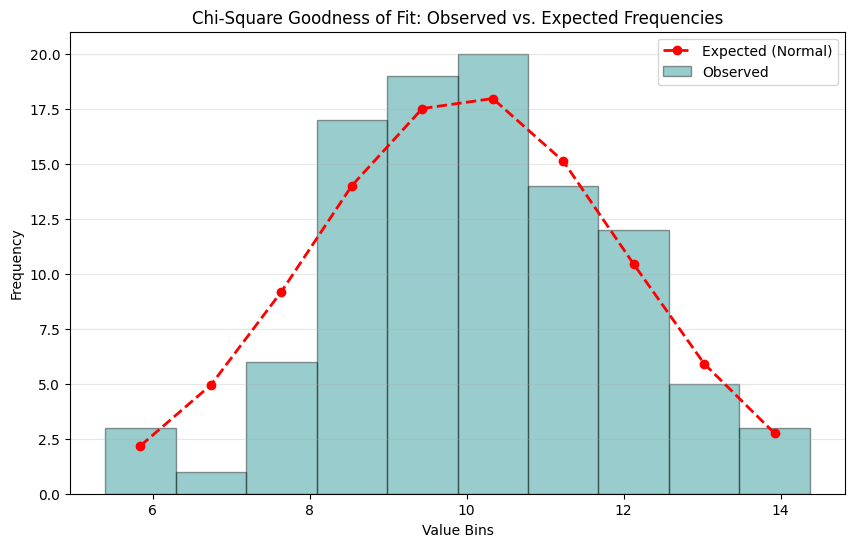

In [39]:
#### **27. Chi-square Goodness of Fit with Simulated Data**


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, norm

# 1. Simulate data from a normal distribution
np.random.seed(1)
n_samples = 100
mu, sigma = 10, 2
sim_data = np.random.normal(loc=mu, scale=sigma, size=n_samples)

# 2. Create bins and get observed frequencies
# We use 10 bins for this sample size
observed_freq, bins = np.histogram(sim_data, bins=10)

# 3. Get expected frequencies from a normal distribution
# norm.cdf calculates the area under the curve for each bin interval
expected_prob = norm.cdf(bins[1:], loc=mu, scale=sigma) - norm.cdf(bins[:-1], loc=mu, scale=sigma)
expected_freq = expected_prob * n_samples

# --- THE FIX: RESCALE EXPECTED FREQUENCIES ---
# The sum of expected_freq must match observed_freq exactly to satisfy scipy.stats.chisquare
# We scale the expected frequencies so their sum equals the total number of samples
expected_freq = expected_freq * (sum(observed_freq) / sum(expected_freq))

# 4. Perform Chi-square Test
# We subtract 1 degree of freedom (ddof=0 is default, meaning k-1)
chi2_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)

# 5. Output Results
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject H0 - The data does NOT follow the normal distribution.")
else:
    print("Result: Fail to reject H0 - The data follows the normal distribution.")

# 6. Visualization
plt.figure(figsize=(10, 6))
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot bars for observed and a line for expected
plt.bar(bin_centers, observed_freq, width=(bins[1]-bins[0]), alpha=0.4, 
        label='Observed', color='teal', edgecolor='black')
plt.plot(bin_centers, expected_freq, color='red', marker='o', 
         linestyle='dashed', linewidth=2, label='Expected (Normal)')

plt.title("Chi-Square Goodness of Fit: Observed vs. Expected Frequencies")
plt.xlabel("Value Bins")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()